In [1]:
import upldmx
import awkward as ak
import numpy as np

In [2]:
events = upldmx.arrays()

In [3]:
tot_eot = ak.count(events.weight)/ak.sum(events.weight)*20*1e6
per_day = 1e12/tot_eot
num_events = ak.count(events.weight)
print(
    f'{num_events} in {tot_eot:.2e} EoT which is ~{num_events*per_day:.0f} per day'
)

131391 in 1.72e+13 EoT which is ~7620 per day


In [17]:
import matplotlib as mpl
import mplhep
%matplotlib inline
mpl.style.use(mplhep.style.ROOT)
import matplotlib.pyplot as plt

def title_bar(text=None, *, by_ldmx='Internal', exp_text_kw = dict(), lumitext_kw = dict(), **kwargs):
    mplhep.label.exp_text('LDMX', by_ldmx, **exp_text_kw, **kwargs)
    if text is not None:
        mplhep.label.lumitext(text, **lumitext_kw, **kwargs)

import hist

In [5]:
hits_in_first_layer = events.EcalRecHits[events.EcalRecHits.layer == 0]

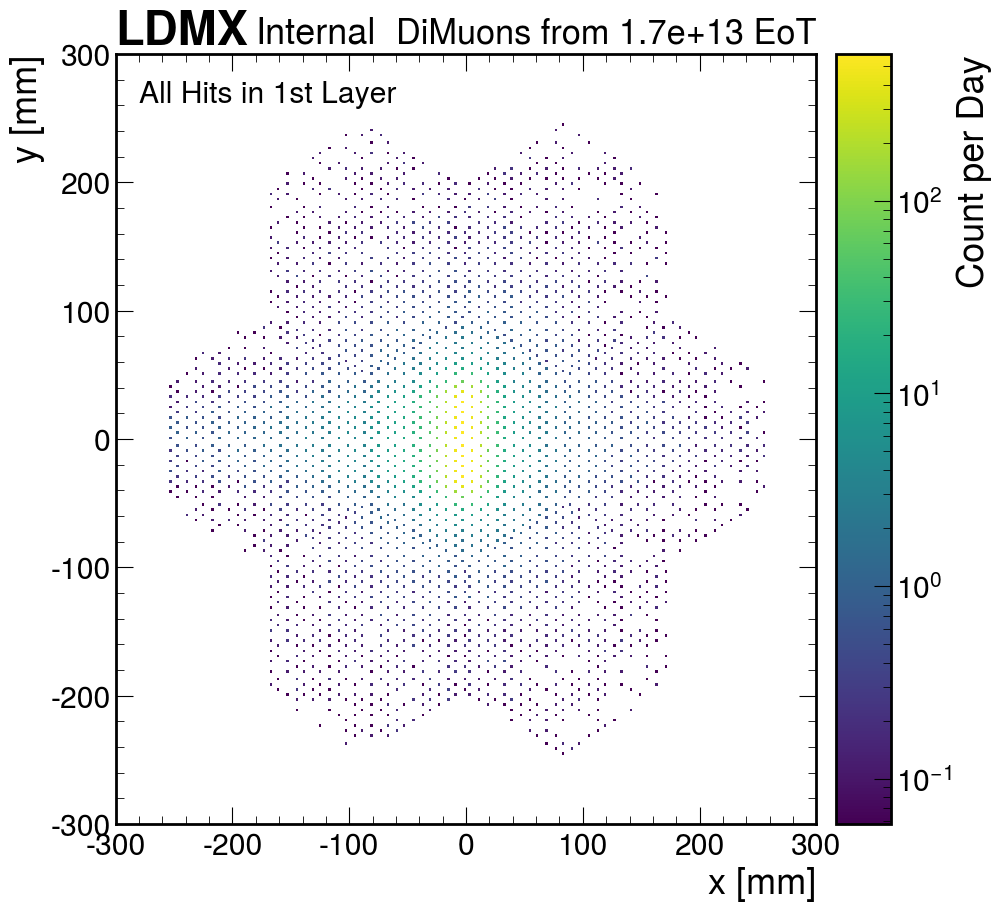

In [36]:
xmax = 300
ymax = 300
hitmap = (
    hist.Hist.new
    .Reg(xmax,-xmax,xmax,label='x [mm]')
    .Reg(ymax,-ymax,ymax,label='y [mm]')
    .Double()
)
hitmap.fill(
    ak.flatten(hits_in_first_layer.xpos),
    ak.flatten(hits_in_first_layer.ypos)
)
hitmap *= per_day
pcm, cb, txt = hitmap.plot(
    cmin=per_day,
    norm='log'
)
cb.set_label('Count per Day')
plt.text(-280,280,'All Hits in 1st Layer',ha='left',va='top',size='small')
title_bar(f'DiMuons from {tot_eot:.1e} EoT')
plt.show()

In [14]:
highest_energy_hit_in_first_layer = ak.drop_none(
    ak.firsts(
        hits_in_first_layer[ak.argsort(hits_in_first_layer.amplitude)]
    )
)

In [15]:
hitid = hist.Hist.new.IntCategory([],growth=True).Double()
hitid.fill(highest_energy_hit_in_first_layer.id)

def get_cell_center(id):
    hits_in_cell= highest_energy_hit_in_first_layer[highest_energy_hit_in_first_layer.id==id]
    return np.array([ak.mean(hits_in_cell.xpos), ak.mean(hits_in_cell.ypos)])
cell_center = np.array([get_cell_center(id) for id in hitid.axes[0]])

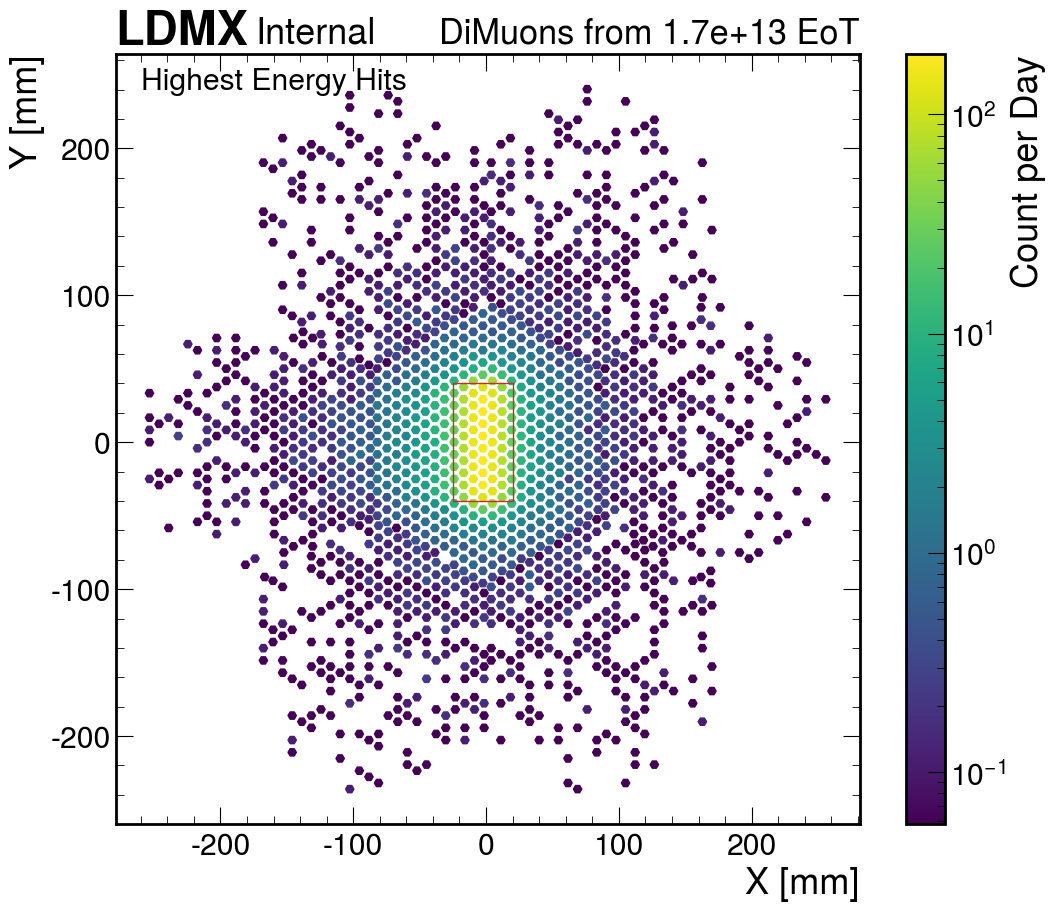

In [33]:
plt.figure(figsize=(12,10))
plt.scatter(
    cell_center[:,0], cell_center[:,1],
    c = hitid.values() * per_day,
    marker='H',
    norm='log',
    # vmax=1000
)
plt.colorbar(label='Count per Day')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.text(-260,255,'Highest Energy Hits',ha='left',va='top',size='small')
title_bar(f'DiMuons from {tot_eot:.1e} EoT')
plt.gca().add_patch(mpl.patches.Rectangle((-25,-40),45,80, facecolor='none',edgecolor='tab:red'))
plt.show()